In [120]:
import requests
from pprint import pprint
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

from scipy import stats

In [2]:
# tip 2: print the type of the response
#type(response)

In [3]:
# tip 3: print the keys of a dictionary
#response.keys()

# Bank Asset Data

In [4]:
five_bank_asset_url="https://banks.data.fdic.gov/api/financials?filters=CERT%3A628%20OR%20CERT%3A3510%20OR%20CERT%3A3511%20OR%20CERT%3A33124%20OR%20CERT%3A7213%20OR%20CERT%3A59017&fields=CERT%2CREPDTE%2CASSET%2CCHBAL%2CSC%2CFREPO%2CLNLSNET%2CLNRE%2CTRADE%2CBKPREM%2CORE%2CINTAN%2CAOA%2CNAME&sort_by=REPDTE&sort_order=DESC&limit=264&offset=0&agg_limit=1&format=json&download=false&filename=data_file"

In [5]:
bank_asset= requests.get(five_bank_asset_url).json()
pprint(bank_asset)

{'data': [{'data': {'AOA': 49332000,
                    'ASSET': 490799000,
                    'BKPREM': 602000,
                    'CERT': 33124,
                    'CHBAL': 122935000,
                    'FREPO': 68655000,
                    'ID': '33124_20230331',
                    'INTAN': 1890000,
                    'LNLSNET': 157130000,
                    'LNRE': 26899000,
                    'NAME': 'GOLDMAN SACHS BANK USA',
                    'ORE': 0,
                    'REPDTE': '20230331',
                    'SC': 32751000,
                    'TRADE': 57504000},
           'score': 0},
          {'data': {'AOA': 112474000,
                    'ASSET': 2518290000,
                    'BKPREM': 19403000,
                    'CERT': 3510,
                    'CHBAL': 365662000,
                    'FREPO': 40359000,
                    'ID': '3510_20230331',
                    'INTAN': 58620000,
                    'LNLSNET': 1030410000,
                    'LNRE'

In [6]:
# tip 2: print the type of the response
type(bank_asset)

dict

In [7]:
# tip 3: print the keys of a dictionary
bank_asset.keys()

dict_keys(['meta', 'data', 'totals'])

In [8]:
#Create a list to hold the data of each financial asset
Combined_assetdata=[]

#loop through the data details of the dictionary 
for asset in bank_asset['data']:
        Date = asset['data']["REPDTE"]
        Total_asset=asset['data']["ASSET"]
        Bank_Certificate=asset['data']["CERT"]
        Bank_Name=asset['data']["NAME"]
        Cash_Balances_due_Depo_In=asset['data']["CHBAL"]
        Securities=asset['data']["SC"]
        Federal_Funds_Sold_Reverse_repurchase=asset['data']["FREPO"]
        Net_Loans_Leases=asset['data']["LNLSNET"]
        Real_Estate_loan=asset['data']["LNRE"]
        Bankpremises_fixedasset=asset['data']["BKPREM"]
        Other_real_estate_owned=asset['data']["ORE"]
        Goodwill_otherIntangibles=asset['data']["INTAN"]
        All_Other_Assets=asset['data']["AOA"]
        
        
        Combined_assetdata.append({"Reporting Date": Date,
                                   "Bank Name":Bank_Name,
                                   "Bank Certificate #": Bank_Certificate,
                                   "Total Asset": Total_asset,
                                  "Cash and Balances due from Depository Institutions": Cash_Balances_due_Depo_In,
                                  "Securities": Securities,
                                   "Federal Funds Sold & Reverse Repurchase Agreements":Federal_Funds_Sold_Reverse_repurchase,
                                  "Net Loans Lease":Net_Loans_Leases,
                                  "All Real Estate Loans":Real_Estate_loan,
                                   "Bank Premises and Fixed Assets":Bankpremises_fixedasset,
                                  "Other Real Estate Owned":Other_real_estate_owned,
                                   "Goodwill and Other Intangibles":Goodwill_otherIntangibles,
                                  "All Other Asset":All_Other_Assets
                                  })
     

In [9]:
new_data = pd.DataFrame(Combined_assetdata)
#new_data

new_bank_asset= new_data.sort_values(by="Reporting Date",ascending=True).reset_index(drop=True)
new_bank_asset

,Reporting Date,Bank Name,Bank Certificate #,Total Asset,Cash and Balances due from Depository Institutions,Securities,Federal Funds Sold & Reverse Repurchase Agreements,Net Loans Lease,All Real Estate Loans,Bank Premises and Fixed Assets,Other Real Estate Owned,Goodwill and Other Intangibles,All Other Asset
0,20120630,CITIBANK NATIONAL ASSN,7213,1347841000,172522000,254308000,71198000,573969000,195686000,4553000,348000,18532000,81484000
1,20120630,GOLDMAN SACHS BANK USA,33124,114693000,44086000,0,11128000,13810000,2586000,0,0,4000,7488000
2,20120630,BANK OF AMERICA NA,3510,1445093157,136863710,328771279,16586665,702943873,412263790,10253110,2501993,63950326,105268172
3,20120630,JPMORGAN CHASE BANK NA,628,1812825000,176095000,342767000,247782000,594303000,275976000,10424000,2050000,35762000,116341000
4,20120630,FIRST REPUBLIC BANK,59017,30987001,800818,3105339,19330,25034919,22526845,126297,3490,168475,1710899
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,20230331,JPMORGAN CHASE BANK NA,628,3267963000,551018000,610041000,364136000,1118613000,382261000,23451000,206000,48371000,196961000
260,20230331,FIRST REPUBLIC BANK,59017,232944161,13159283,34313041,0,172508687,142800644,1734733,0,203723,10971889
261,20230331,WELLS FARGO BANK NA,3511,1687507000,160472000,412394000,42255000,898858000,400457000,10555000,214000,32480000,72473000
262,20230331,BANK OF AMERICA NA,3510,2518290000,365662000,763775000,40359000,1030410000,325560000,19403000,283000,58620000,112474000


##Part 1: a) Create stack stacked bar chart, b) liquidity ration, 3)Pie chart analysis of current asset vs. non-current
 

In [10]:
#Total assets=  Cash and balances due from depository institutions + securities+ Net Loans and leases + Other Real Estates Owned+ Goodwill and other Intangibles
#Current asset = Cash and balances due from depository institutions + securities
#create dataframe of each bank of the current asset vs. total asset
new_bank_asset["Current Asset"]=new_bank_asset["Cash and Balances due from Depository Institutions"]+new_bank_asset["Securities"]
new_bank_asset["Curret Asset Ratio"]=new_bank_asset["Current Asset"]/new_bank_asset["Total Asset"]
new_bank_asset.tail(6)

,Reporting Date,Bank Name,Bank Certificate #,Total Asset,Cash and Balances due from Depository Institutions,Securities,Federal Funds Sold & Reverse Repurchase Agreements,Net Loans Lease,All Real Estate Loans,Bank Premises and Fixed Assets,Other Real Estate Owned,Goodwill and Other Intangibles,All Other Asset,Current Asset,Curret Asset Ratio
258,20230331,CITIBANK NATIONAL ASSN,7213,1721547000,320187000,470731000,74700000,614300000,170027000,12097000,16000,13881000,87740000,790918000,0.459423
259,20230331,JPMORGAN CHASE BANK NA,628,3267963000,551018000,610041000,364136000,1118613000,382261000,23451000,206000,48371000,196961000,1161059000,0.355285
260,20230331,FIRST REPUBLIC BANK,59017,232944161,13159283,34313041,0,172508687,142800644,1734733,0,203723,10971889,47472324,0.203793
261,20230331,WELLS FARGO BANK NA,3511,1687507000,160472000,412394000,42255000,898858000,400457000,10555000,214000,32480000,72473000,572866000,0.339475
262,20230331,BANK OF AMERICA NA,3510,2518290000,365662000,763775000,40359000,1030410000,325560000,19403000,283000,58620000,112474000,1129437000,0.448494
263,20230331,GOLDMAN SACHS BANK USA,33124,490799000,122935000,32751000,68655000,157130000,26899000,602000,0,1890000,49332000,155686000,0.317209


In [11]:
#create a stack bar chart with the compositon of the asset.
#Total Asset= Cash and Balances due from Depository Institutions+Securities+Net Loans Lease+Federal funds sold & revenue repurchase agreements +Trading account assets + Banking premises and fixed assets+ Other real estate owned+ Goodwill and other intangibles+All other assets

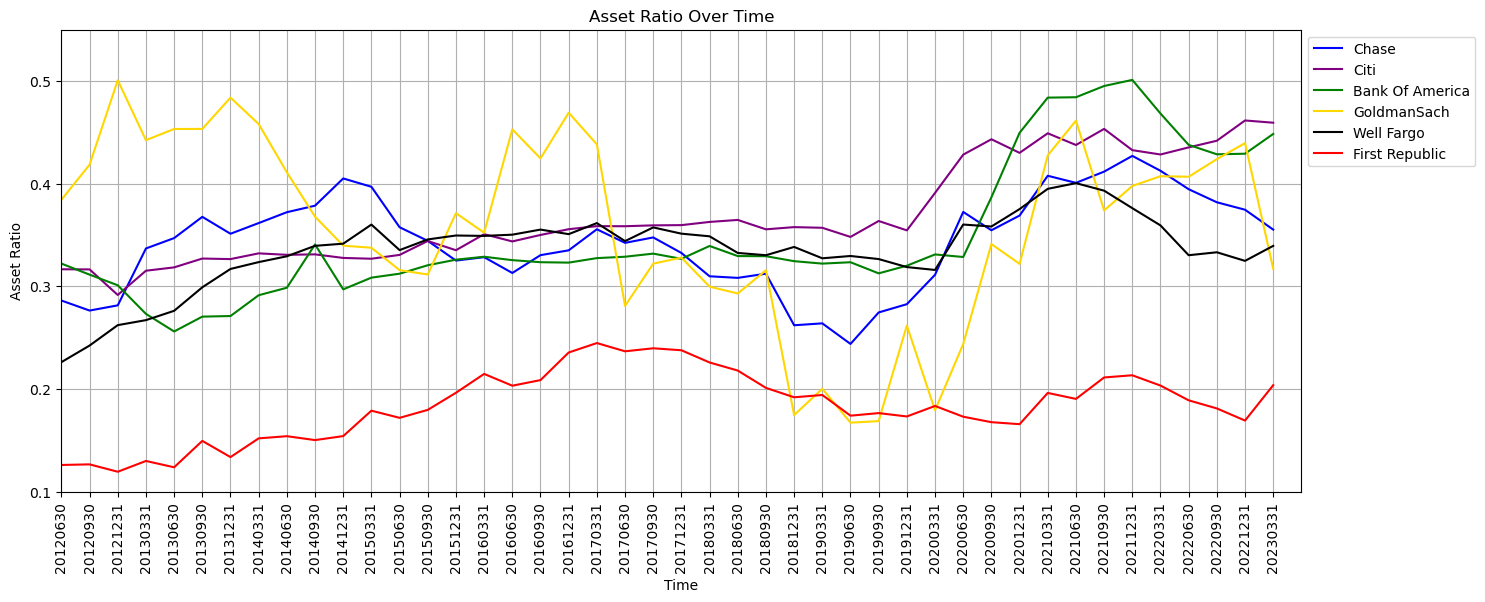

In [89]:
#Plot current asset ratio over time for the six banks, time=np.arange(1,len(new_bank_asset["Reporting Date"].unique())+1,1)
plt.figure(figsize=(16,6))
x_axis = np.arange(len(new_bank_asset["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

#time
Chase,=plt.plot(x_axis,new_bank_asset.loc[(new_bank_asset["Bank Name"]=="JPMORGAN CHASE BANK NA"),"Curret Asset Ratio"], color="blue", label="Chase")
Citi,=plt.plot(x_axis,new_bank_asset.loc[(new_bank_asset["Bank Name"]=="CITIBANK NATIONAL ASSN"),"Curret Asset Ratio"], color="purple", label="Citi")
BOA, = plt.plot(x_axis, new_bank_asset.loc[(new_bank_asset["Bank Name"]=="BANK OF AMERICA NA"),"Curret Asset Ratio"], color="green", label="Bank Of America")
GoldmanSachs,=plt.plot(x_axis, new_bank_asset.loc[(new_bank_asset["Bank Name"]=="GOLDMAN SACHS BANK USA"),"Curret Asset Ratio"], color="gold", label="GoldmanSach")
Wells_Fargo,=plt.plot(x_axis, new_bank_asset.loc[(new_bank_asset["Bank Name"]=="WELLS FARGO BANK NA"),"Curret Asset Ratio"], color="black", label="Well Fargo")
First_republic,=plt.plot(x_axis, new_bank_asset.loc[(new_bank_asset["Bank Name"]=="FIRST REPUBLIC BANK"),"Curret Asset Ratio"], color="red", label="First Republic")
plt.xticks(tick_locations, new_bank_asset["Reporting Date"].unique(), rotation="vertical")
# Add labels to X and Y axes :: Add title
plt.title("Asset Ratio Over Time")
plt.xlabel("Time")
plt.ylabel("Asset Ratio")

# Add limits to x axis and y-axis
plt.xlim(0,44)
plt.ylim(0.1,0.55)

# Create a legend for the chart
plt.legend(bbox_to_anchor= (1, 1))
plt.grid()

In [13]:
#Create a pie chart of the Chase's avg current asset and other assets


# Bank Liabilities

In [14]:
bank_liabilites_url="https://banks.data.fdic.gov/api/financials?filters=CERT%3A628%20OR%20CERT%3A3510%20OR%20CERT%3A3511%20OR%20CERT%3A33124%20OR%20CERT%3A7213%20OR%20CERT%3A59017&fields=CERT%2CREPDTE%2CDEP%2CDEPDOM%2CDEPFOR%2CFREPP%2CTRADEL%2COTHBRF%2CALLOTHL%2CEQTOT%2CNAME%2CLIABEQ%2CLIAB&sort_by=REPDTE&sort_order=DESC&limit=264&offset=0&agg_limit=1&format=json&download=false&filename=data_file"

In [15]:
Bank_liabilites= requests.get(bank_liabilites_url).json()
pprint(Bank_liabilites)

{'data': [{'data': {'ALLOTHL': 35566000,
                    'CERT': 33124,
                    'DEP': 337173000,
                    'DEPDOM': 324813000,
                    'DEPFOR': 12360000,
                    'EQTOT': 50422000,
                    'FREPP': 24000000,
                    'ID': '33124_20230331',
                    'LIAB': 440377000,
                    'LIABEQ': 490799000,
                    'NAME': 'GOLDMAN SACHS BANK USA',
                    'OTHBRF': 9660000,
                    'REPDTE': '20230331',
                    'TRADEL': 31706000},
           'score': 0},
          {'data': {'ALLOTHL': 41508000,
                    'CERT': 3510,
                    'DEP': 2015381000,
                    'DEPDOM': 1903082000,
                    'DEPFOR': 112299000,
                    'EQTOT': 232471000,
                    'FREPP': 141110000,
                    'ID': '3510_20230331',
                    'LIAB': 2285819000,
                    'LIABEQ': 2518290000,
 

In [16]:
#Create a list to hold the data of each financial asset
Combined_liabilitesdata=[]

for liab in Bank_liabilites['data']:
        Date = liab['data']["REPDTE"]
        Bank_Certificate=liab['data']["CERT"]
        Bank_Name=liab['data']["NAME"]
        Total_liabilites_and_capitals=liab['data']["LIABEQ"]
        Total_liabilities=liab['data']["LIAB"]
        Total_Deposit=liab['data']["DEP"]
        Deposits_in_Domestic_Offices=liab['data']["DEPDOM"]
        Deposits_in_Foreign_Offices=liab['data']["DEPFOR"]
        All_other_liabilities=liab['data']["ALLOTHL"]
        Total_Equity_Capital=liab['data']["EQTOT"]
        Federal_funds_purchased_repurchase=liab['data']["FREPP"]
        Trading_Liabilities=liab['data']["TRADEL"]
        Other_borrowed_funds=liab['data']["OTHBRF"]
        
        
        
        
        
        Combined_liabilitesdata.append({"Reporting Date": Date,
                                   "Bank Name":Bank_Name,
                                   "Bank Certificate #": Bank_Certificate,
                                   "Total Liabilites and capitals": Total_liabilites_and_capitals,
                                   "Total Liabilites":Total_liabilities,
                                   "Total Deposit": Total_Deposit,
                                   "Total Domestic Deposit":Deposits_in_Domestic_Offices,
                                   "Total Foreign Deposit":Deposits_in_Foreign_Offices,
                                   "All other Liabilities":All_other_liabilities,
                                   "Total EquityCapital":Total_Equity_Capital,
                                   "Federal funds purchased and repurchase agreements":Federal_funds_purchased_repurchase,
                                   "Trading Liabilites": Trading_Liabilities,
                                   "Other borrowed funds": Other_borrowed_funds
                                  })
     

In [17]:
new_liabilites_data= pd.DataFrame(Combined_liabilitesdata)
#new_data

new_bank_liabilites= new_liabilites_data.sort_values(by="Reporting Date",ascending=True).reset_index(drop=True)
new_bank_liabilites

,Reporting Date,Bank Name,Bank Certificate #,Total Liabilites and capitals,Total Liabilites,Total Deposit,Total Domestic Deposit,Total Foreign Deposit,All other Liabilities,Total EquityCapital,Federal funds purchased and repurchase agreements,Trading Liabilites,Other borrowed funds
0,20120630,CITIBANK NATIONAL ASSN,7213,1347841000,1192463000,950510000,386149000,564361000.0,56476000,155378000,21726000,60983000,102768000
1,20120630,GOLDMAN SACHS BANK USA,33124,114693000,94738000,53774000,53774000,0.0,9878000,19955000,16745000,13822000,519000
2,20120630,BANK OF AMERICA NA,3510,1445093157,1265806391,1062273625,991685005,70588620.0,25374938,179286766,80222077,40184413,39536551
3,20120630,JPMORGAN CHASE BANK NA,628,1812825000,1676378000,1162998000,832455000,330543000.0,80160000,136447000,188478000,128307000,87465000
4,20120630,FIRST REPUBLIC BANK,59017,30987001,27930388,24215303,24215303,NaN,431367,3056613,0,15791,3203581
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,20230331,JPMORGAN CHASE BANK NA,628,3267963000,2958911000,2472913000,2043646000,429267000.0,147462000,309052000,110991000,126220000,101065000
260,20230331,FIRST REPUBLIC BANK,59017,232944161,214954325,104473959,104473959,0.0,3760542,17989836,445753,50578,105444141
261,20230331,WELLS FARGO BANK NA,3511,1687507000,1524982000,1406796000,1387849000,18947000.0,28607000,162525000,8289000,20579000,49675000
262,20230331,BANK OF AMERICA NA,3510,2518290000,2285819000,2015381000,1903082000,112299000.0,41508000,232471000,141110000,29893000,56413000


# Bank Performace 

In [18]:
bank_performance_url="https://banks.data.fdic.gov/api/financials?filters=CERT%3A628%20OR%20CERT%3A3510%20OR%20CERT%3A3511%20OR%20CERT%3A33124%20OR%20CERT%3A7213%20OR%20CERT%3A59017&fields=CERT%2CREPDTE%2CROE%2CROA%2CNIMY%2CEEFFR%2CLNLSNTV%2CLNLSDEPR%2CIDLNCORR%2CDEPDASTR%2CIDT1RWAJR%2CRBC1AAJ%2CNAME&sort_by=REPDTE&sort_order=DESC&limit=264&offset=0&agg_limit=1&format=json&download=false&filename=data_file"

In [19]:
bank_performace=requests.get(bank_performance_url).json()
pprint(bank_performace)

{'data': [{'data': {'CERT': 33124,
                    'DEPDASTR': 66.18,
                    'EEFFR': 42.61487964989059,
                    'ID': '33124_20230331',
                    'IDLNCORR': 64.20702505679868,
                    'IDT1RWAJR': 13.598852660054359,
                    'LNLSDEPR': 46.60218938052572,
                    'LNLSNTV': 32.02,
                    'NAME': 'GOLDMAN SACHS BANK USA',
                    'NIMY': 2.1266688279154753,
                    'RBC1AAJ': 9.776439756905367,
                    'REPDTE': '20230331',
                    'ROA': 1.3532890282542038,
                    'ROE': 13.41},
           'score': 0},
          {'data': {'CERT': 3510,
                    'DEPDASTR': 75.57,
                    'EEFFR': 52.53852097631926,
                    'ID': '3510_20230331',
                    'IDLNCORR': 55.169138563463974,
                    'IDT1RWAJR': 13.347971635290307,
                    'LNLSDEPR': 51.127305457380025,
                    

In [20]:
combined_performance=[]

for perf in bank_performace['data']:
        Date = perf['data']["REPDTE"]
        Bank_Certificate=perf['data']["CERT"]
        Bank_Name=perf['data']["NAME"]
        Net_Interest_Margin=perf['data']["NIMY"]
        Return_on_Assets=perf['data']["ROA"]
        Return_on_Equity=perf['data']["ROE"]
        Efficiency_Ratio=perf['data']["EEFFR"]
        Net_Loans_Leases_to_Assets=perf['data']["LNLSNTV"]
        Net_Loans_Leases_to_Deposits=perf['data']["LNLSNTV"]
        Net_Loans_Leases_to_CoreDeposit=perf['data']["IDLNCORR"]
        Domestic_Deposits_to_Total_Assets=perf['data']["DEPDASTR"]
        Tier_1_Risk_Based_Capital_Ratio=perf['data']["IDT1RWAJR"]
        
        
        combined_performance.append({"Reporting Date": Date,
                                     "Bank Name":Bank_Name,
                                   "Bank Certificate #": Bank_Certificate,
                                    "Net Interest Margin": Net_Interest_Margin,
                                    "Return on Assets": Return_on_Assets,
                                    "Return on Equity": Return_on_Assets,
                                    "Efficiency Ratio": Efficiency_Ratio,
                                    "Net Loans Leases to Assets": Net_Loans_Leases_to_Assets,
                                    "Net Loans Leases to Deposits": Net_Loans_Leases_to_Deposits,
                                    "Net Loans Leases to CoreDeposit": Net_Loans_Leases_to_CoreDeposit,
                                    "Domestic Deposits to Total Assets":Domestic_Deposits_to_Total_Assets,
                                    "Tier 1 Risk Based Capital Ratio": Tier_1_Risk_Based_Capital_Ratio
                                       })
     

In [21]:
new_perf_data= pd.DataFrame(combined_performance)

new_bank_perfor= new_perf_data.sort_values(by="Reporting Date",ascending=True).reset_index(drop=True)
new_bank_perfor

,Reporting Date,Bank Name,Bank Certificate #,Net Interest Margin,Return on Assets,Return on Equity,Efficiency Ratio,Net Loans Leases to Assets,Net Loans Leases to Deposits,Net Loans Leases to CoreDeposit,Domestic Deposits to Total Assets,Tier 1 Risk Based Capital Ratio
0,20120630,CITIBANK NATIONAL ASSN,7213,3.801293,0.910206,0.910206,57.158555,42.58,42.58,184.903162,28.65,15.240706
1,20120630,GOLDMAN SACHS BANK USA,33124,0.594831,1.314566,1.314566,29.320988,12.04,12.04,58.566582,46.89,18.345798
2,20120630,BANK OF AMERICA NA,3510,2.657255,0.952095,0.952095,64.680503,48.64,48.64,74.325034,68.62,12.863604
3,20120630,JPMORGAN CHASE BANK NA,628,2.323562,0.683181,0.683181,79.750202,32.78,32.78,75.544175,45.92,9.121593
4,20120630,FIRST REPUBLIC BANK,59017,4.203551,1.285897,1.285897,50.839580,80.79,80.79,107.527984,78.15,13.680957
...,...,...,...,...,...,...,...,...,...,...,...,...
259,20230331,JPMORGAN CHASE BANK NA,628,3.037683,1.448429,1.448429,49.889716,34.23,34.23,59.124465,62.54,17.263379
260,20230331,FIRST REPUBLIC BANK,59017,1.697503,0.483146,0.483146,68.120847,74.06,74.06,294.056164,44.85,11.673376
261,20230331,WELLS FARGO BANK NA,3511,3.596714,1.413670,1.413670,56.405511,53.27,53.27,68.612129,82.24,12.240646
262,20230331,BANK OF AMERICA NA,3510,2.806533,1.343057,1.343057,52.538521,40.92,40.92,55.169139,75.57,13.347972


# Bank Correlation

#### Consumer Sentiment Index (CSI) v.s. Net Loans Lease
- According to the absolute value of Pearson Coefficient Correlation, the correlation between CSI and net loans lease is very weak.


#### Consumer Sentiment Index (CSI) v.s. Total Domestic Deposit Amount
- According to the absolute value of Pearson Coefficient Correlation, there is correlation between CSI and total domestic deposit amount(most of them is above 0.5 except Wells Fargo which only has 0.19)

- Although all of banks have negative correlations between CSI and total domestic deposit amount,looking into the slope of regression model(time v.s total domestic deposit amount) for each bank, JPMorgan Chase has the steepest slope(30K).In other words,it was experiencing the fastest growth rate in total deposit amount over time compared to all the other bank(Bank of America,Citi,Goldman Sachs,Wells Fargo,First Republic)

In [101]:
# Read the original CSV file of consumer sentiment index
consumer_index = pd.read_csv("Resources/us_csi_original.csv")

In [179]:
#Rename the header of column and reset index
renamed_consumer_index = consumer_index.rename(columns = {"UMCSENT" : "Consumer Sentiment Index"})

#Display consumer index dataframe
renamed_consumer_index.tail(5)

,DATE,Consumer Sentiment Index
39,2022-01-01,63.133333
40,2022-04-01,57.866667
41,2022-07-01,56.100000
42,2022-10-01,58.800000
43,2023-01-01,64.633333


In [103]:
#Create variables for CSI and each bank's Net Loans Lease

CSI = renamed_consumer_index["Consumer Sentiment Index"]

chase_loan_csi = new_bank_asset.loc[(new_bank_asset["Bank Name"]=="JPMORGAN CHASE BANK NA"),"Net Loans Lease"]
citi_loan_csi = new_bank_asset.loc[(new_bank_asset["Bank Name"]=="CITIBANK NATIONAL ASSN"),"Net Loans Lease"]
boa_loan_csi = new_bank_asset.loc[(new_bank_asset["Bank Name"]=="BANK OF AMERICA NA"),"Net Loans Lease"]
gs_loan_csi = new_bank_asset.loc[(new_bank_asset["Bank Name"]=="GOLDMAN SACHS BANK USA"),"Net Loans Lease"]
wf_loan_csi = new_bank_asset.loc[(new_bank_asset["Bank Name"]=="WELLS FARGO BANK NA"),"Net Loans Lease"]
fr_loan_csi = new_bank_asset.loc[(new_bank_asset["Bank Name"]=="FIRST REPUBLIC BANK"),"Net Loans Lease"]

#Calculate and print the correlation coefficient between CSI and each bank's Net Loans Lease
print(f"The correlation coefficient between CSI and Chase's Net Loans Lease is {round(st.pearsonr(CSI,chase_loan_csi)[0],2)}")
print(f"The correlation coefficient between CSI and Citi's Net Loans Lease is {round(st.pearsonr(CSI,citi_loan_csi)[0],2)}")
print(f"The correlation coefficient between CSI and BoA's Net Loans Lease is {round(st.pearsonr(CSI,boa_loan_csi)[0],2)}")
print(f"The correlation coefficient between CSI and Goldman Sachs's Net Loans Lease is {round(st.pearsonr(CSI,gs_loan_csi)[0],2)}")
print(f"The correlation coefficient between CSI and Wells Fargo's Net Loans Lease is {round(st.pearsonr(CSI,wf_loan_csi)[0],2)}")
print(f"The correlation coefficient between CSI and First Republic's Net Loans Lease is {round(st.pearsonr(CSI,fr_loan_csi)[0],2)}")


The correlation coefficient between CSI and Chase's Net Loans Lease is -0.35
The correlation coefficient between CSI and Citi's Net Loans Lease is -0.02
The correlation coefficient between CSI and BoA's Net Loans Lease is -0.13
The correlation coefficient between CSI and Goldman Sachs's Net Loans Lease is -0.5
The correlation coefficient between CSI and Wells Fargo's Net Loans Lease is 0.37
The correlation coefficient between CSI and First Republic's Net Loans Lease is -0.55


In [113]:
#Create variables for each bank's Total Domestic Deposit

chase_dep_csi = new_bank_liabilites.loc[(new_bank_liabilites["Bank Name"]=="JPMORGAN CHASE BANK NA"),"Total Domestic Deposit"]
citi_dep_csi = new_bank_liabilites.loc[(new_bank_liabilites["Bank Name"]=="CITIBANK NATIONAL ASSN"),"Total Domestic Deposit"]
boa_dep_csi = new_bank_liabilites.loc[(new_bank_liabilites["Bank Name"]=="BANK OF AMERICA NA"),"Total Domestic Deposit"]
gs_dep_csi = new_bank_liabilites.loc[(new_bank_liabilites["Bank Name"]=="GOLDMAN SACHS BANK USA"),"Total Domestic Deposit"]
wf_dep_csi = new_bank_liabilites.loc[(new_bank_liabilites["Bank Name"]=="WELLS FARGO BANK NA"),"Total Domestic Deposit"]
fr_dep_csi = new_bank_liabilites.loc[(new_bank_liabilites["Bank Name"]=="FIRST REPUBLIC BANK"),"Total Domestic Deposit"]

#Calculate and print the correlation coefficient between CSI and each bank's Net Loans Lease
print(f"The correlation coefficient between CSI and Chase's Total Domestic Deposit is {round(st.pearsonr(CSI,chase_dep_csi)[0],2)}")
print(f"The correlation coefficient between CSI and Citi's Total Domestic Deposit is {round(st.pearsonr(CSI,citi_dep_csi)[0],2)}")
print(f"The correlation coefficient between CSI and BoA's Total Domestic Deposit is {round(st.pearsonr(CSI,boa_dep_csi)[0],2)}")
print(f"The correlation coefficient between CSI and Goldman Sachs's Total Domestic Deposit is {round(st.pearsonr(CSI,gs_dep_csi)[0],2)}")
print(f"The correlation coefficient between CSI and Wells Fargo's Total Domestic Deposit is {round(st.pearsonr(CSI,wf_dep_csi)[0],2)}")
print(f"The correlation coefficient between CSI and First Republic's Total Domestic Deposit is {round(st.pearsonr(CSI,fr_dep_csi)[0],2)}")


The correlation coefficient between CSI and Chase's Total Domestic Deposit is -0.55
The correlation coefficient between CSI and Citi's Total Domestic Deposit is -0.62
The correlation coefficient between CSI and BoA's Total Domestic Deposit is -0.53
The correlation coefficient between CSI and Goldman Sachs's Total Domestic Deposit is -0.63
The correlation coefficient between CSI and Wells Fargo's Total Domestic Deposit is -0.19
The correlation coefficient between CSI and First Republic's Total Domestic Deposit is -0.52


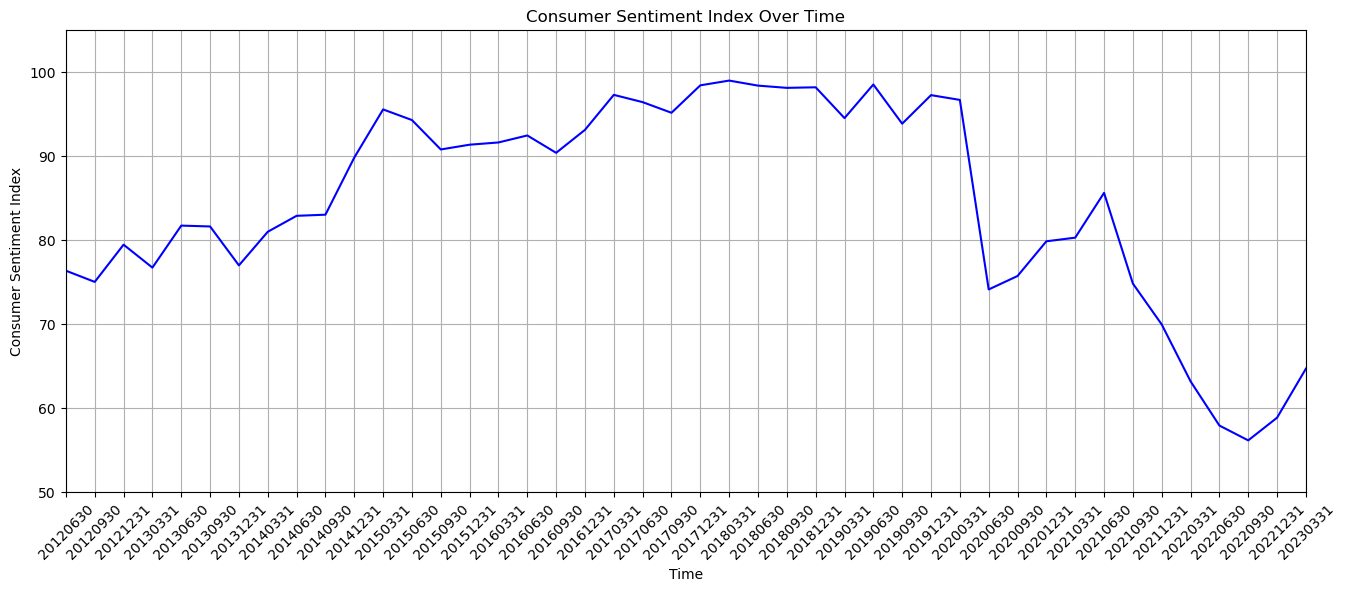

In [158]:
# Consumer Sentiment Index vs Reporting Date

# Note: the date shown in Consumer Sentiment Index is different from the reporting data from FDIC API.But they
# represent the same quarter of each year.Using the reporting date from FDIC API here to ensure the consistency.

#Plot the data and set up xticks
plt.figure(figsize=(16,6))
x_axis = np.arange(len(new_bank_asset["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]
plt.plot(x_axis,CSI, color="blue")
plt.xticks(tick_locations, new_bank_asset["Reporting Date"].unique(), rotation=45)


# Add title & labels to X and Y axes
plt.title("Consumer Sentiment Index Over Time")
plt.xlabel("Time")
plt.ylabel("Consumer Sentiment Index")

# Add limits to x axis and y-axis
plt.xlim(0,43)
plt.ylim(50,105)

# Create a legend for the chart
plt.grid()

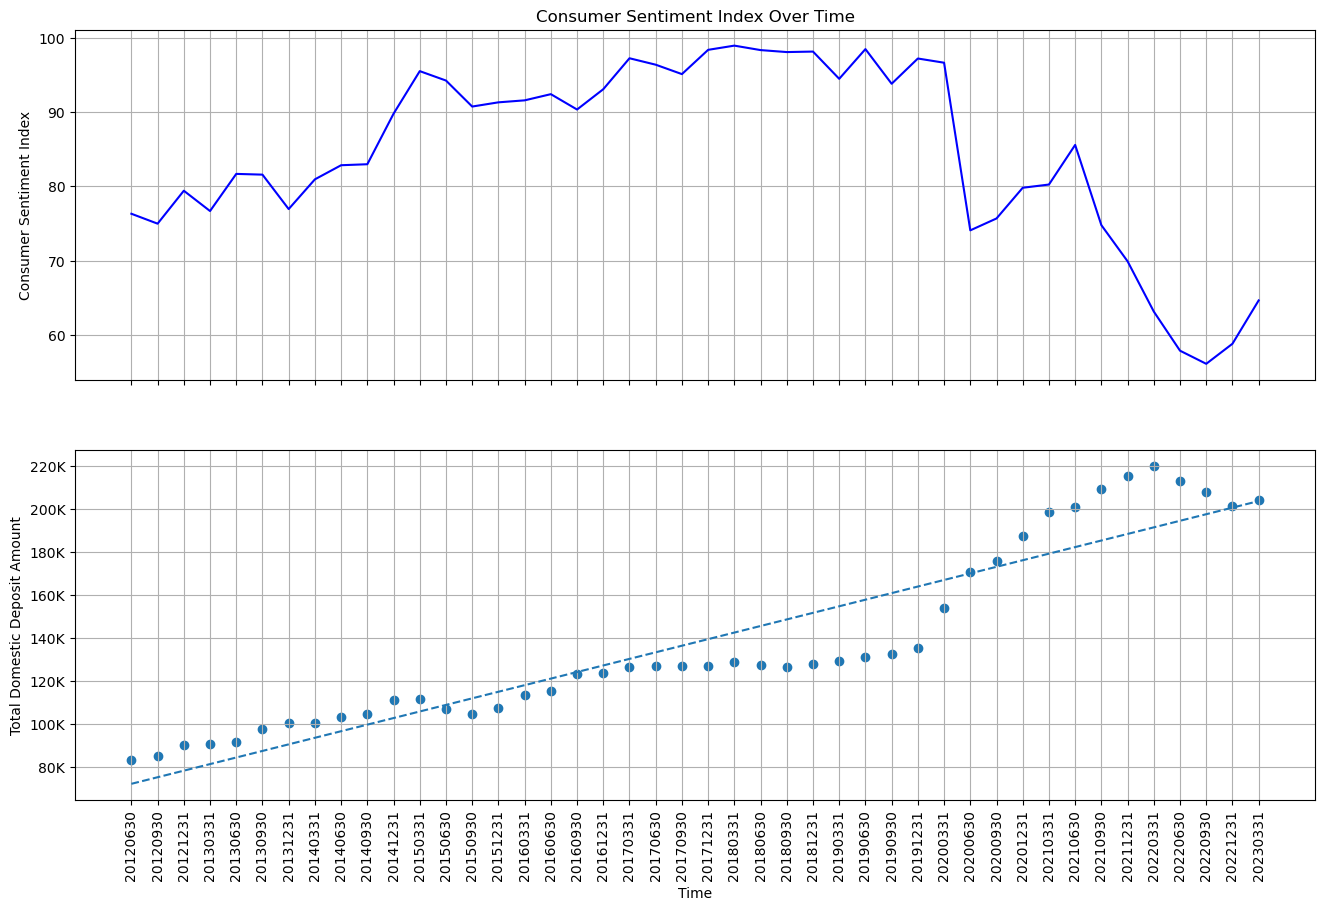

30532052.431289643


In [177]:
#VERSION 1: To combine CSI and Chase Total Deposit Amount

import matplotlib.ticker as ticker


# Data for the first graph
x_axis = np.arange(len(new_bank_asset["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16, 10))

# Plot the first graph
ax1.plot(x_axis, CSI, color="blue")
ax1.set_ylabel("Consumer Sentiment Index")
ax1.set_title("Consumer Sentiment Index Over Time")
ax1.grid(True)

# Data for the second graph
p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(x_axis, chase_dep_csi)
p_fit = p_slope * x_axis + p_int

# Plot the second graph
ax2.scatter(x_axis, chase_dep_csi)
ax2.plot(x_axis, p_fit, "--")
ax2.set_ylabel("Total Domestic Deposit Amount")
ax2.set_xlabel("Time")

# Set x-axis tick locations and labels
ax2.set_xticks(tick_locations)
ax2.set_xticklabels(new_bank_asset["Reporting Date"].unique(), rotation="vertical")
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x * 1e-7))
ax2.yaxis.set_major_formatter(formatter)

# Display the figure
plt.grid()
plt.show()
print(p_slope)


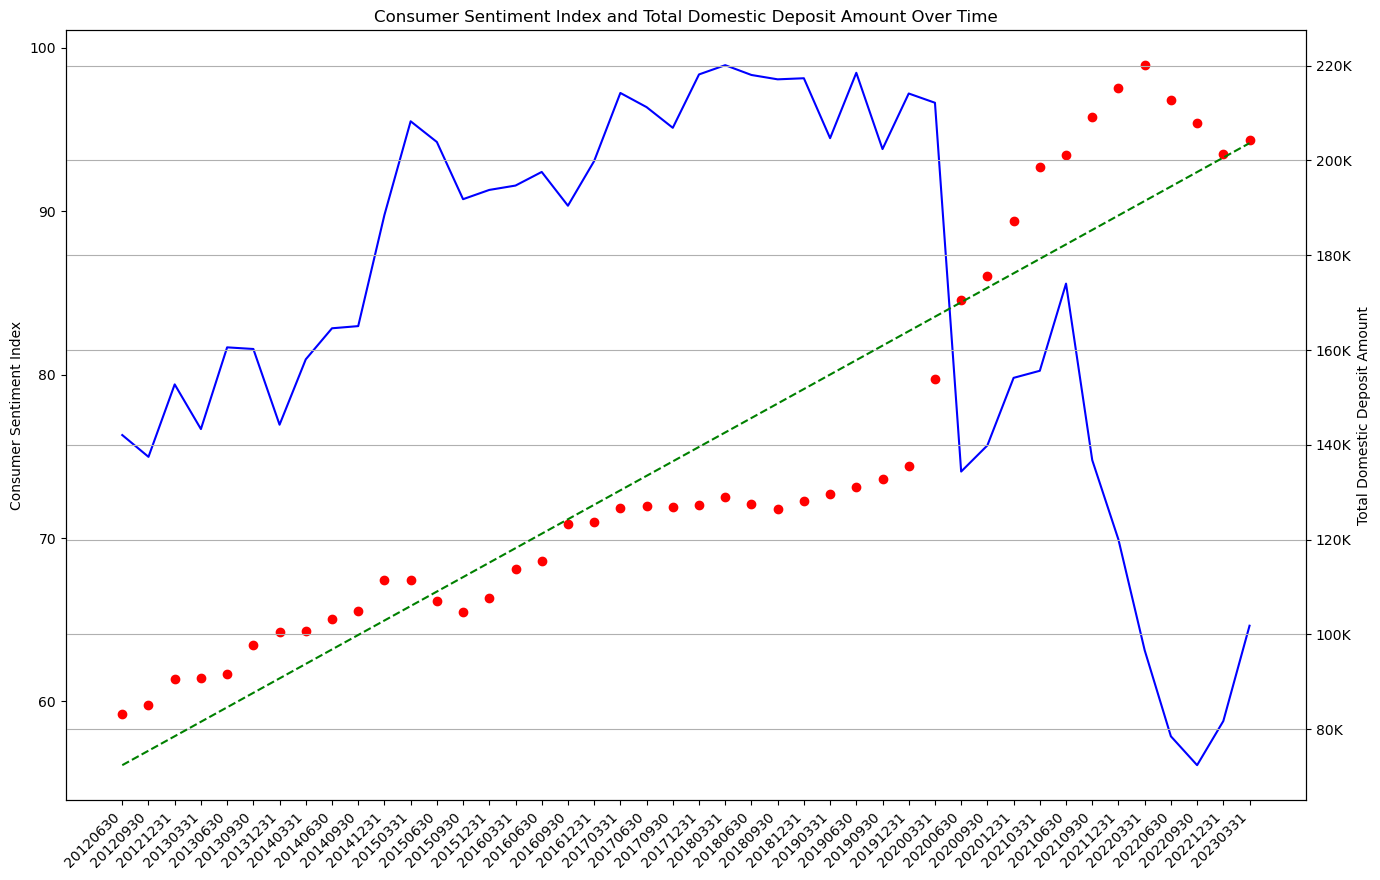

30532052.431289643


In [178]:
#VERSION 2: To combine CSI and Chase Total Deposit Amount


# Data for the first graph
x_axis = np.arange(len(new_bank_asset["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Create a figure and two subplots
fig, ax1 = plt.subplots(figsize=(16, 10))
ax2 = ax1.twinx()

# Plot the first graph
ax1.plot(x_axis, CSI, color="blue")
ax1.set_ylabel("Consumer Sentiment Index")
ax1.set_title("Consumer Sentiment Index and Total Domestic Deposit Amount Over Time")

# Data for the second graph
p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(x_axis, chase_dep_csi)
p_fit = p_slope * x_axis + p_int

# Plot the second graph
ax2.scatter(x_axis, chase_dep_csi, color="red")
ax2.plot(x_axis, p_fit, "--", color="green")

# Set y-axis formatter for ax2 to show values in dollar amounts
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x * 1e-7))
ax2.yaxis.set_major_formatter(formatter)
ax2.set_ylabel("Total Domestic Deposit Amount")

# Set x-axis tick locations and labels
ax1.set_xticks(tick_locations)
ax1.set_xticklabels(new_bank_asset["Reporting Date"].unique(), rotation=45, ha='right')

# Display the figure
plt.grid()
plt.show()
print(p_slope)


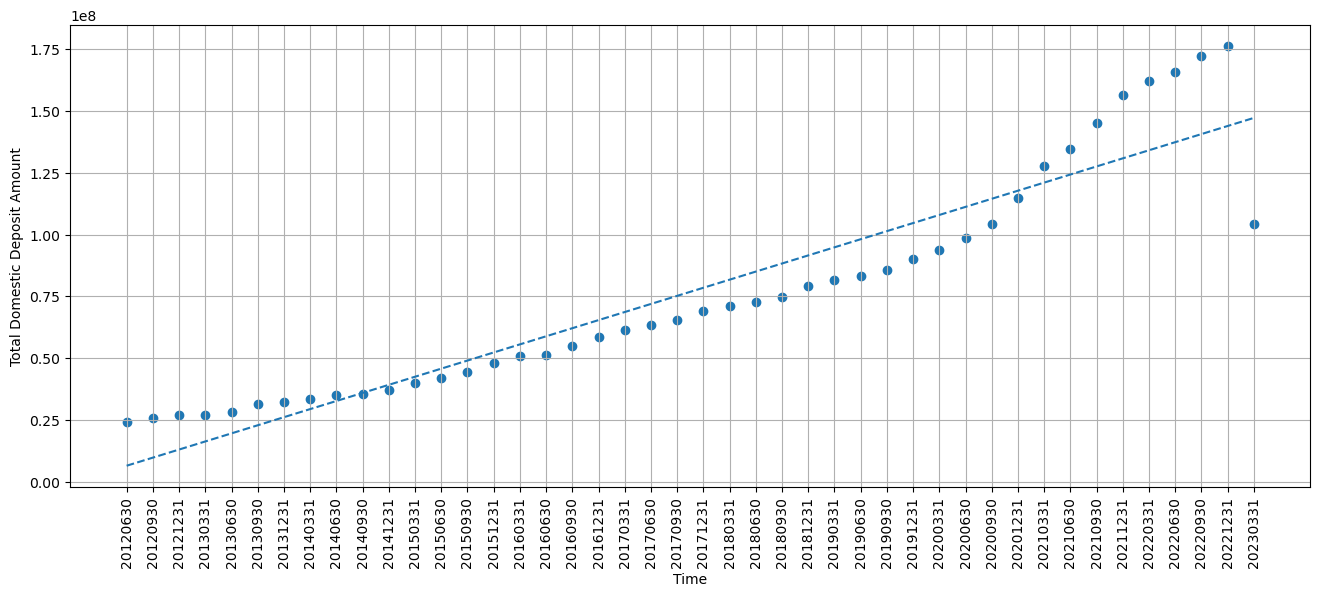

3273814.9325581393


In [156]:
#Slope of first republic domestic deposit

#Plot the data and set up xticks
plt.figure(figsize=(16,6))
x_axis = np.arange(len(new_bank_asset["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(x_axis, fr_dep_csi)
p_fit = p_slope * x_axis + p_int
plt.scatter(x_axis,fr_dep_csi)
plt.plot(x_axis,p_fit,"--")
plt.xticks(tick_locations, new_bank_asset["Reporting Date"].unique(), rotation="vertical")

# Add title & labels to X and Y axes
plt.xlabel("Time")
plt.ylabel("Total Domestic Deposit Amount")


# Create a legend for the chart
plt.grid()
plt.show()
print(p_slope)

In [ ]:
#Add Net Loans Lease Over Time vs Reporting Date


In [ ]:
#Add Total Domestic Deposit vs Reporting Date
